In [5]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/gdrive')

# Change directory to the location of the Yelp dataset
os.chdir('/content/gdrive/My Drive/Business Success Model/yelp_training_set')

# List the files in the directory
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 final_dataset
 final_dataset.csv
 fine_tuned_bert_model
 predictions_review_ratings_combined_before_150000.csv
 predictions_review_ratings_combined.csv
'predictions_review_ratings_combined_from_73441_with(0 index start).csv'
 predictions_review_ratings_combined_full.csv
'predictions_review_ratings_combined_with(0 index start).csv'
 predictions_review_ratings_from_150000.csv
 Test_code1.ipynb
 Untitled.ipynb
 yelp_training_set_business.csv
 yelp_training_set_business.json
 yelp_training_set_checkin.csv
 yelp_training_set_checkin.json
 yelp_training_set_review.csv
 yelp_training_set_review.json
 yelp_training_set_review_test1.csv
 yelp_training_set_user.csv
 yelp_training_set_user.json


In [7]:
final_df = pd.read_csv("final_dataset.csv")
final_df

,business_id,funny_votes_mean,useful_votes_mean,cool_votes_mean,mean_review_ratings,median_review_ratings,std_review_ratings,review_count,business_rating,open
0,--5jkZ3-nUPZxUvtcbr8Uw,0.454545,0.818182,0.454545,4.090909,4.0,0.889331,3,5.0,True
1,--BlvDO_RG2yElKu9XA1_g,0.621622,1.864865,1.189189,3.689189,4.0,0.884679,5,5.0,True
2,-0QBrNvhrPQCaeo7mTo0zQ,0.333333,0.000000,0.000000,4.333333,4.0,0.577350,5,3.5,True
3,-0bUDim5OGuv8R0Qqq6J4A,0.333333,0.333333,0.166667,3.250000,3.5,0.935414,14,3.5,True
4,-0xwm_AwS0d_5rwUprHGuw,1.625000,2.250000,1.750000,3.500000,3.5,0.816497,6,4.5,True
...,...,...,...,...,...,...,...,...,...,...
11995,ApdZu7kZT1_TXsAVdSibHA,2.400000,4.600000,3.000000,3.800000,3.5,1.151086,4,3.5,False
11996,QKD4PtM5ue3OMYm2WK4Quw,1.000000,0.666667,0.333333,3.166667,3.5,1.527525,3,3.5,False
11997,0LCqaCnEGesFEhpa6qNauQ,0.250000,1.250000,1.250000,4.250000,4.5,0.957427,3,3.5,False
11998,xtlgvMFsv2Xpor-Cc-txoQ,0.000000,2.666667,0.333333,4.666667,4.5,0.288675,4,3.5,False


In [8]:
# Import necessary libraries for classification and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [9]:
# Define the features and target variable for the classification task
features = ['funny_votes_mean', 'useful_votes_mean', 'cool_votes_mean',
            'mean_review_ratings', 'median_review_ratings', 'std_review_ratings', 'review_count', 'business_rating']
target = 'open'

In [11]:
# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final_df[features], final_df[target], test_size=0.2, random_state=42)

In [12]:
# Train a Random Forest Classifier on the training data
# Train a Gaussian Mixture Model (GMM) on the training data
gmm_classifier = GaussianMixture(n_components=2, random_state=42)
gmm_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Train an XGBoost Classifier on the training data
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [13]:
# Make predictions using the trained classifiers on the test data
gmm_predictions = gmm_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

In [14]:
# Calculate and print metrics for GMM Classifier
gmm_accuracy = accuracy_score(y_test, gmm_predictions)
gmm_precision = precision_score(y_test, gmm_predictions)
gmm_recall = recall_score(y_test, gmm_predictions)
gmm_f1 = f1_score(y_test, gmm_predictions)
gmm_conf_matrix = confusion_matrix(y_test, gmm_predictions)

print("\nGMM Metrics:")
print(f"Accuracy: {gmm_accuracy}")
print(f"Precision: {gmm_precision}")
print(f"Recall: {gmm_recall}")
print(f"F1 Score: {gmm_f1}")
print("Confusion Matrix:")
print(gmm_conf_matrix)


GMM Metrics:
Accuracy: 0.39708333333333334
Precision: 0.7560975609756098
Recall: 0.29212860310421285
F1 Score: 0.4214314274290283
Confusion Matrix:
[[ 426  170]
 [1277  527]]


In [15]:
# Calculate and print metrics for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print("Confusion Matrix:")
print(rf_conf_matrix)

Random Forest Metrics:
Accuracy: 0.9545833333333333
Precision: 0.9491255961844197
Recall: 0.9927937915742794
F1 Score: 0.9704687076672989
Confusion Matrix:
[[ 500   96]
 [  13 1791]]


In [16]:
# Calculate and print metrics for XGBoost Classifier
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print("Confusion Matrix:")
print(xgb_conf_matrix)


XGBoost Metrics:
Accuracy: 0.86625
Precision: 0.873551637279597
Recall: 0.9611973392461197
F1 Score: 0.9152810768012669
Confusion Matrix:
[[ 345  251]
 [  70 1734]]


In [17]:
# Extract and print feature importance for Random Forest
feature_importance_rf = pd.DataFrame({'Feature': features, 'Importance': rf_classifier.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
feature_importance_rf['Rank_RF'] = range(1, len(feature_importance_rf) + 1)

pd.set_option("display.max_rows", None)
with pd.option_context('display.colheader_justify', 'center'):
    print("Random Forest Feature Importance:")
    print(feature_importance_rf[['Rank_RF', 'Feature', 'Importance']].to_string(index=False))

Random Forest Feature Importance:
 Rank_RF        Feature         Importance
   1        std_review_ratings   0.164325 
   2       mean_review_ratings   0.152904 
   3         useful_votes_mean   0.147873 
   4              review_count   0.133898 
   5           cool_votes_mean   0.130543 
   6          funny_votes_mean   0.123797 
   7           business_rating   0.081372 
   8     median_review_ratings   0.065289 


In [18]:
# Extract and print feature importance for XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': features, 'Importance': xgb_classifier.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)
feature_importance_xgb['Rank_XGB'] = range(1, len(feature_importance_xgb) + 1)

pd.set_option("display.max_rows", None)
with pd.option_context('display.colheader_justify', 'center'):
    print("\nXGBoost Feature Importance:")
    print(feature_importance_xgb[['Rank_XGB', 'Feature', 'Importance']].to_string(index=False))


XGBoost Feature Importance:
 Rank_XGB        Feature         Importance
    1           business_rating   0.153769 
    2           cool_votes_mean   0.128767 
    3        std_review_ratings   0.127611 
    4         useful_votes_mean   0.126337 
    5          funny_votes_mean   0.123531 
    6              review_count   0.117093 
    7       mean_review_ratings   0.115959 
    8     median_review_ratings   0.106933 


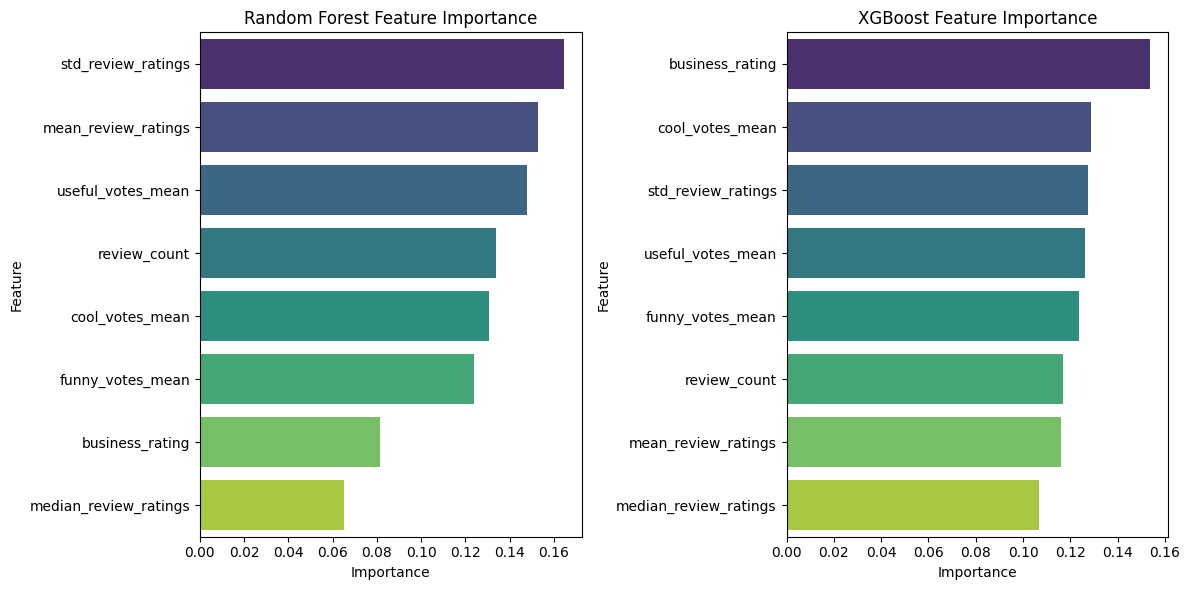

In [21]:
# Plot the feature importance for Random Forest and XGBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Random Forest Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb, palette='viridis')
plt.title('XGBoost Feature Importance')

plt.tight_layout()

# Save the plot as an image file
plt.savefig('feature_importance_plot.png')

plt.show()